# Convolutional Neural Network
CNN to classify images from the CIFAR10 dataset. 

In [ ]:
import numpy as np
import scipy 
from matplotlib import pyplot as plt
import keras
#keras.backend.image_data_format()
keras.backend.set_image_data_format('channels_first') # specify the ordering of the array dimensions for each image 


In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dropout, Dense, Flatten

In [ ]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
np.shape(x_train[0])

(3, 32, 32)

### Data visualisation

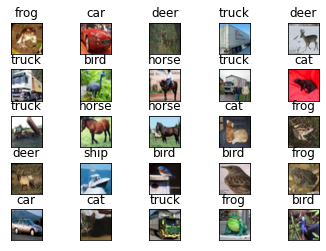

In [ ]:
N=5
start_val = 0# pick an element for the code to plot the following N**2 values
fig, axes = plt.subplots(N,N)
items = ['aeroplane','car','bird','cat','deer','dog','frog','horse','ship','truck']
for row in range(N):
  for col in range(N):
    idx = start_val+row+N*col
    axes[row,col].imshow(np.transpose(x_train[idx],(1,2,0)))
    y_target = int(y_train[idx]) #labels are floats (0-9)
    target = items[y_target]
    axes[row,col].set_title(target)
    axes[row,col].set_xticks([])
    axes[row,col].set_yticks([])
    
plt.subplots_adjust(hspace=0.5)


# Data pre-processing

In [ ]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
print(y_test[0])

y_train = keras.utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)

print(y_test[0])

[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# Build the CNN


In [ ]:
keras.backend.clear_session() # clears any previous models
model = Sequential()
#first layer: 32 filters, 3x3 kernel size, shifting by 1. The model will identify edges
model.add(Conv2D(filters=32,kernel_size=3,strides=1,padding='same', 
                 activation='relu',input_shape=(3,32,32)))
model.add(Conv2D(filters=32,kernel_size=3,strides=1,padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,kernel_size=3,strides=1,padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2,seed=42)) #get rid of 20% of nodes
model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same',
                 activation='relu')) #increase the numer of filters as the layers get deeper

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=3,strides=1,padding='same',
                 activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(256, activation='relu')) # small dense neural network at the end
model.add(Dense(10, activation='softmax')) # probabilitues, all need to sum to 1

In [ ]:
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 16, 16)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 8, 8)          0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 8, 8)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 8, 8)          1

# Train the CNN model
10 epochs, 128 images

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model_data = model.fit(x_train,y_train,batch_size=128,epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
391/391 [==============================] - 11s 8ms/step - loss: 2.4186 - accuracy: 0.2525 - val_loss: 1.4224 - val_accuracy: 0.4859
Epoch 2/10
391/391 [==============================] - 3s 7ms/step - loss: 1.4492 - accuracy: 0.4703 - val_loss: 1.2790 - val_accuracy: 0.5539
Epoch 3/10
391/391 [==============================] - 3s 7ms/step - loss: 1.2588 - accuracy: 0.5432 - val_loss: 1.0919 - val_accuracy: 0.6198
Epoch 4/10
391/391 [==============================] - 3s 7ms/step - loss: 1.1255 - accuracy: 0.5993 - val_loss: 1.0127 - val_accuracy: 0.6428
Epoch 5/10
391/391 [==============================] - 3s 7ms/step - loss: 1.0496 - accuracy: 0.6250 - val_loss: 0.9424 - val_accuracy: 0.6694
Epoch 6/10
391/391 [==============================] - 3s 7ms/step - loss: 0.9712 - accuracy: 0.6541 - val_loss: 0.9022 - val_accuracy: 0.6907
Epoch 7/10
391/391 [==============================] - 3s 7ms/step - loss: 0.9198 - accuracy: 0.6735 - val_loss: 0.8649 - val_accuracy: 0.6990
Epoch

# Test the CNN model

In [ ]:
model_score = model.evaluate(x_test, y_test, verbose = 1)
print('Test loss: ', model_score[0])
print('Test accuracy: ', model_score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.8076 - accuracy: 0.7254
Test loss:  0.8075703382492065
Test accuracy:  0.7253999710083008


model: 73% accuracy

Examine the model's efficacy by plotting the decrease in loss over time

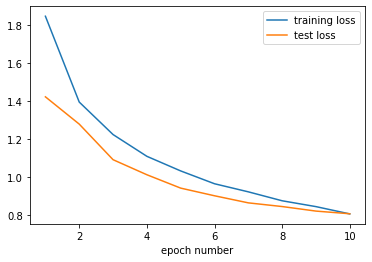

In [ ]:
nb_epoch = len(model_data.history['loss'])
plt.plot(np.arange(1,nb_epoch+1),model_data.history['loss'],label='training loss')
plt.plot(np.arange(1,nb_epoch+1),model_data.history['val_loss'],label='test loss')
plt.xlabel('epoch number')
plt.legend()


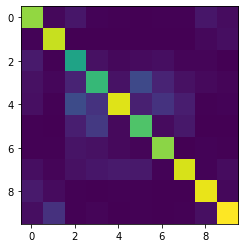

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
y_pred.shape
A = confusion_matrix(y_pred.argmax(axis=1),y_test.argmax(axis=1))
plt.imshow(A)

The model confuses 3s with 5s, which corresponds to cats and dogs. Also, ships with trucks